# Basic statistics with pyclesperanto
A common use case for image processing in the biology context is deriving statistics of segmented objects. clEsperanto offers a function for that: [statistics_of_labelled_pixels](https://clij.github.io/clij2-docs/reference_statisticsOfLabelledPixels).

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

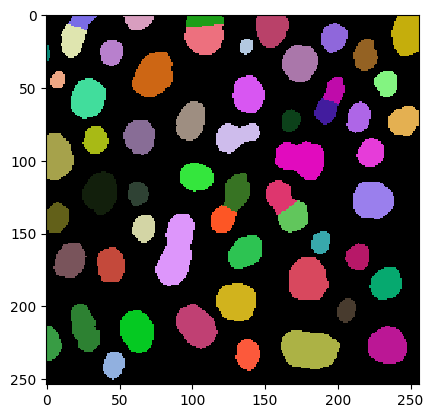

In [4]:
# load data
image = imread('https://samples.fiji.sc/blobs.png').squeeze()

# segment the image
labels = cle.voronoi_otsu_labeling(image, spot_sigma=3.5)
cle.imshow(labels, labels=True)

## Deriving basic statistics of labelled objects

In [5]:
statistics = cle.statistics_of_labelled_pixels(image, labels)
statistics.keys()

AttributeError: module 'pyclesperanto' has no attribute 'statistics_of_labelled_pixels'

We can use [pandas](https://pandas.pydata.org/) to process that kind of tabular data. 

In [6]:
import pandas as pd

In [7]:
table = pd.DataFrame(statistics)
table

NameError: name 'statistics' is not defined

In [8]:
table.describe()

NameError: name 'table' is not defined